In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from torchgeo.datasets import ReforesTree
ds = ReforesTree(root="../data/reforestree/", download=False, checksum=True)

In [3]:
ds[0].keys()

dict_keys(['image', 'boxes', 'label', 'agb'])

(21, 4)


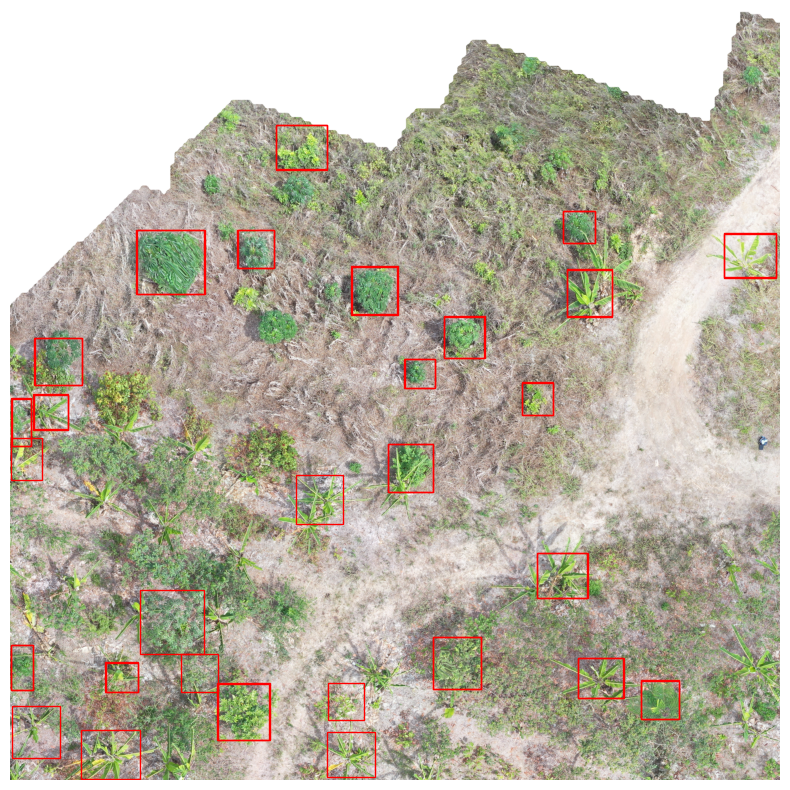

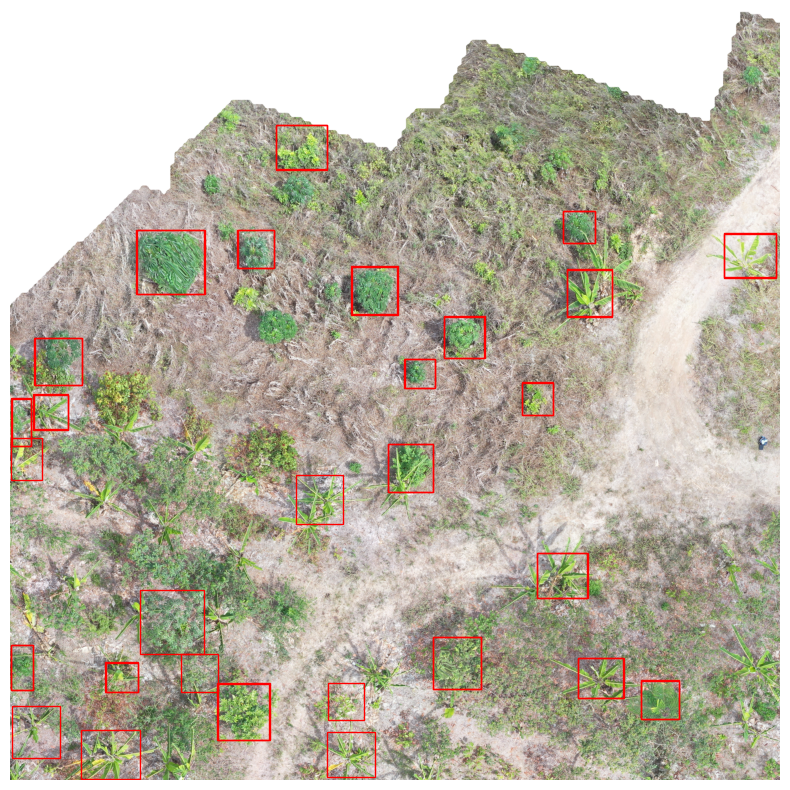

In [369]:
print(ds[0]['boxes'].numpy().shape)
ds.plot(ds[10], show_titles=False)

In [54]:
print(ds[0]['boxes']) # coordinates of boxes
print(ds[0]['label']) # tree type
print(ds[0]['agb']) # agb value

tensor([[1584.5260, 3605.1919, 2002.9177, 3995.9585],
        [2576.5479, 3521.6582, 2761.1316, 3715.5154],
        [2022.0178, 3309.3467, 2396.8035, 3686.2920],
        [2595.9714, 2735.0383, 2905.9556, 3042.4167],
        [2271.8169, 3073.7432, 2495.1174, 3305.5437],
        [2862.3230, 3658.7354, 3095.2598, 3918.9004],
        [2579.5479, 3524.6582, 2759.1316, 3713.5154],
        [2025.0178, 3312.3467, 2394.8035, 3684.2920],
        [2598.9714, 2738.0383, 2903.9556, 3040.4167],
        [2274.8169, 3076.7432, 2493.1174, 3303.5437],
        [3800.3315, 2234.5310, 3986.7327, 2430.1655],
        [3475.7583, 2079.4524, 3743.1345, 2328.6021],
        [2694.6096, 3888.3972, 2903.7158, 3996.1001],
        [3877.4390, 1770.5835, 3994.6587, 2001.0277],
        [3714.0112, 2061.4800, 3872.2429, 2222.6682],
        [3416.0117, 2837.4719, 3661.4238, 3081.6174],
        [3478.7583, 2082.4524, 3741.1345, 2326.6021],
        [2697.6096, 3891.3972, 2901.7158, 3994.1001],
        [3880.4390, 1773.583

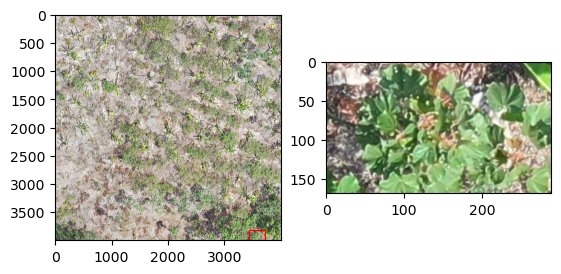

In [7]:
img_choice = 1
tree_choice = 68
img = np.moveaxis(ds[img_choice]['image'].numpy(), 0, -1)
tree1 = [int(x) for x in ds[img_choice]['boxes'].numpy()[tree_choice]]

fig, axs = plt.subplots(1,2)
axs[0].imshow(img)
tree1_rec = plt.Rectangle((tree1[0], tree1[1]), tree1[2] - tree1[0], tree1[3] - tree1[1], linewidth=1, edgecolor='r', facecolor='none')
axs[0].add_patch(tree1_rec)

axs[1].imshow(img[tree1[1]:tree1[3], tree1[0]:tree1[2]])
plt.show()

(169, 289, 3)
(799, 799, 3)


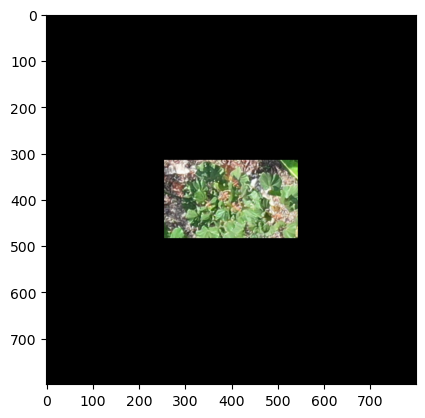

In [15]:
tree = img[tree1[1]:tree1[3], tree1[0]:tree1[2]]
print(tree.shape)
w_extend = int((800 - tree.shape[0]) /2)
h_extend = int((800 - tree.shape[1]) /2)
tree = np.pad(tree, ((w_extend,w_extend),(h_extend,h_extend),(0,0)), 'constant')
print(tree.shape)
plt.imshow(tree)
plt.show()

In [4]:
from tqdm import tqdm
import matplotlib.image

for img_choice in tqdm(range(30, len(ds))): # len(ds) # got to 30
    img = np.moveaxis(ds[img_choice]['image'].numpy(), 0, -1)
    for tree_choice in range(len(ds[img_choice]['boxes'])):  # len(ds[img_choice]['boxes'])
        tree = [int(x) for x in ds[img_choice]['boxes'].numpy()[tree_choice]]
        tree_img = img[tree[1]:tree[3], tree[0]:tree[2]]
        matplotlib.image.imsave('../data/trees/tree_{}_{}.png'.format(img_choice, tree_choice), tree_img)
        

100%|██████████| 75/75 [20:11<00:00, 16.16s/it]


# Mapping Dataset Exploration

In [7]:
mapping = pd.read_csv('../data/reforestree/mapping/final_dataset.csv')

img_path = "Nestor Macias RGB_1_0_3800_4000_7800.png"
sample_mapping = mapping[mapping.img_path == img_path]
print(sample_mapping.shape)
sample_mapping.head(3)

(81, 43)


img_path         xmin         ymin  \
1161  Nestor Macias RGB_1_0_3800_4000_7800.png  2745.540039  2572.849609   
1162  Nestor Macias RGB_1_0_3800_4000_7800.png  3251.048584  1187.834229   
1163  Nestor Macias RGB_1_0_3800_4000_7800.png  3156.514648  3723.586914   

             xmax         ymax     score           img_name  tile_index  \
1161  3063.874268  2907.672607  0.682771  Nestor Macias RGB           1   
1162  3597.348877  1573.163330  0.651012  Nestor Macias RGB           1   
1163  3536.362305  3998.221191  0.614625  Nestor Macias RGB           1   

      tile_xmin  tile_ymin  ...  is_musacea_g               site          X_g  \
1161          0       3800  ...           1.0  Nestor Macias RGB  5029.889498   
1162          0       3800  ...           1.0  Nestor Macias RGB  5242.925898   
1163          0       3800  ...           1.0  Nestor Macias RGB  5203.768686   

              Y_g  updated diameter   group  updated height        AGB  \
1161  6748.496192         12.732366  banana             0.0   6.769828   
1162  5921.611659         15.628979  banana             0.0  10.475951   
1163  6945.141580          9.549274  banana             0.0   3.668243   

        carbon   id  
1161  2.640233  188  
1162  4.085621  336  
1163  1.430615  247  

[3 rows x 43 columns]

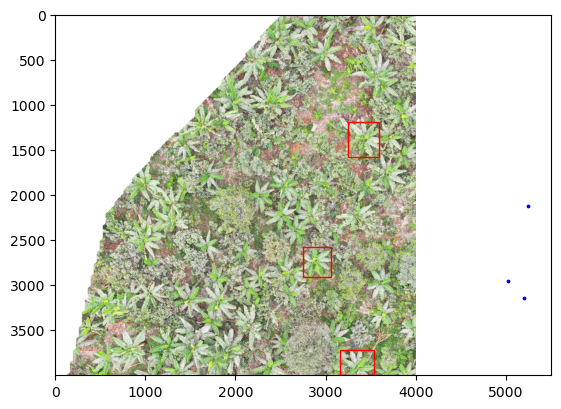

In [10]:
from matplotlib import image
path = "../data/reforestree/tiles/Nestor Macias RGB/Nestor Macias RGB_1_0_3800_4000_7800.png"
img = image.imread(path)

ax = plt.gca()
plt.imshow(img)

plot_mapping = sample_mapping.head(3)
plt.scatter(plot_mapping.X_g - x_min, plot_mapping.Y_g - y_min, s=3, c='b')

for tree in zip(plot_mapping.xmin, plot_mapping.ymin, plot_mapping.xmax, plot_mapping.ymax):
    tree1 = [int(x) for x in tree]
    tree_rec = plt.Rectangle((tree1[0], tree1[1]), tree1[2] - tree1[0], tree1[3] - tree1[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(tree_rec)

# plt.savefig("mapping_data.png", dpi=300)
plt.show()

# Relationship of X (bounding box) and X_g

In [199]:
mapping = pd.read_csv('../data/reforestree/mapping/final_dataset.csv')

site = "Nestor Macias RGB"
sample_mapping = mapping[mapping.img_name == site].copy()
print(sample_mapping.shape)
sample_mapping["X"] = (sample_mapping.xmin + sample_mapping.xmax)/2
sample_mapping["Y"] = (sample_mapping.ymin + sample_mapping.ymax)/2
sample_mapping.head(3)

(872, 43)


img_path         xmin         ymin  \
1144  Nestor Macias RGB_2_0_7600_4000_11600.png  2038.578125   776.137329   
1145  Nestor Macias RGB_2_0_7600_4000_11600.png  3483.235840  2694.406738   
1146  Nestor Macias RGB_2_0_7600_4000_11600.png  3756.116699  2317.328613   

             xmax         ymax     score           img_name  tile_index  \
1144  2377.252197  1138.199463  0.685017  Nestor Macias RGB           2   
1145  3810.904297  3039.304688  0.602500  Nestor Macias RGB           2   
1146  3996.301758  2687.208740  0.569891  Nestor Macias RGB           2   

      tile_xmin  tile_ymin  ...          X_g          Y_g  updated diameter  \
1144          0       7600  ...  4669.113995  7592.683032         11.140820   
1145          0       7600  ...  5159.743280  8607.924422          9.549274   
1146          0       7600  ...  5301.238395  8424.540683          7.161956   

       group  updated height       AGB    carbon   id            X  \
1144  banana             0.0  5.093951  1.986641   33  2207.915161   
1145  banana             0.0  3.668243  1.430615  172  3647.070068   
1146  banana             0.0  1.987644  0.775181  305  3876.209229   

                Y  
1144   957.168396  
1145  2866.855713  
1146  2502.268677  

[3 rows x 45 columns]

In [200]:
from sklearn.linear_model import LinearRegression

X = np.expand_dims(sample_mapping.X + sample_mapping.tile_xmin, axis=1)
y = sample_mapping.X_g
reg = LinearRegression().fit(X, y)
print("Score: ", reg.score(X, y))
print("Coef: ", reg.coef_)
print("Intercept: ", reg.intercept_)
# X_g = a * (X + xmin) + b -> X = (X_g - b)/a - xmin
sample_mapping["X_field"] = ((sample_mapping.X_g - reg.intercept_) / reg.coef_[0]) - sample_mapping.tile_xmin

Score:  0.9453792419300571
Coef:  [0.59091295]
Intercept:  3472.269330120135


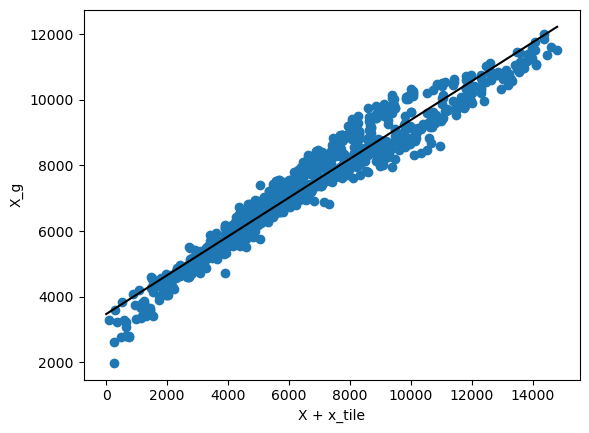

In [201]:
plt.scatter(sample_mapping.X + sample_mapping.tile_xmin, sample_mapping.X_g)
x = np.linspace(0, max(X))
plt.plot(x, reg.coef_[0] * x + reg.intercept_, 'k')
plt.xlabel("X + x_tile"); plt.ylabel("X_g")
plt.show()

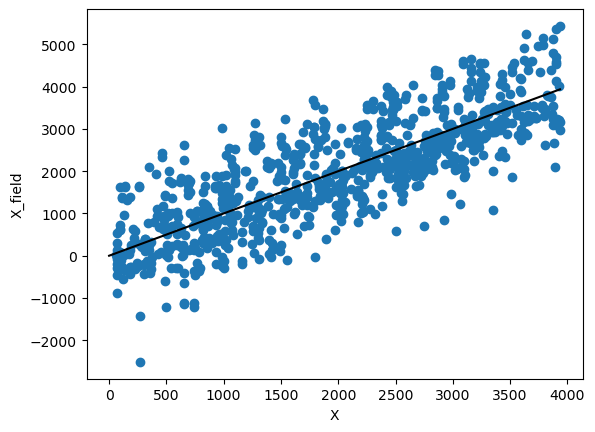

In [202]:
plt.scatter(sample_mapping.X, sample_mapping.X_field)
x = np.linspace(0, max(sample_mapping.X))
plt.plot(x, x, 'k')
plt.xlabel("X"); plt.ylabel("X_field")
plt.show()

In [203]:
X = np.expand_dims(sample_mapping.Y + sample_mapping.tile_ymin, axis=1)
y = sample_mapping.Y_g
reg = LinearRegression().fit(X, y)
print("Score: ", reg.score(X, y))
print("Coef: ", reg.coef_)
print("Intercept: ", reg.intercept_)
sample_mapping["Y_field"] = (sample_mapping.Y_g - reg.intercept_) / reg.coef_[0] - sample_mapping.tile_ymin

Score:  0.9620741067603378
Coef:  [0.55615583]
Intercept:  3047.3585882989705


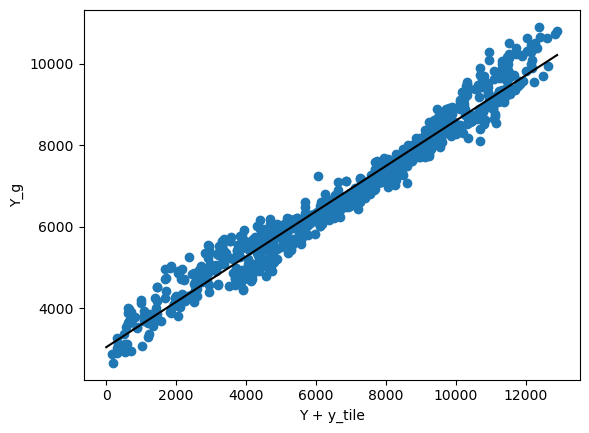

In [204]:
plt.scatter(sample_mapping.Y + sample_mapping.tile_ymin, sample_mapping.Y_g)
x = np.linspace(0, max(X))
plt.plot(x, reg.coef_[0] * x + reg.intercept_, 'k')
plt.xlabel("Y + y_tile"); plt.ylabel("Y_g")
plt.show()

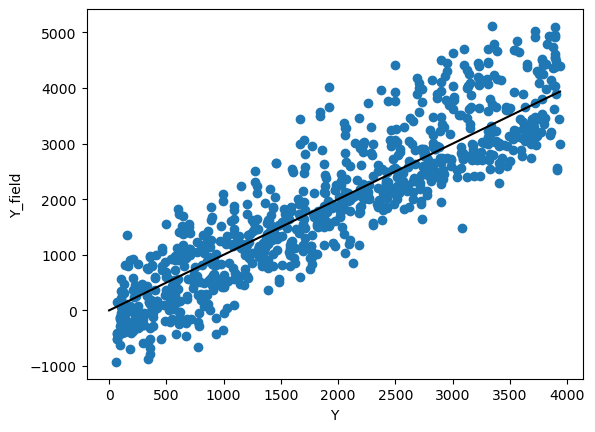

In [205]:
plt.scatter(sample_mapping.Y, sample_mapping.Y_field)
x = np.linspace(0, max(sample_mapping.Y))
plt.plot(x, x, 'k')
plt.xlabel("Y"); plt.ylabel("Y_field")
plt.show()

In [206]:
x_min = 0
y_min = 3800

img_path = "{}_1_{}_{}_{}_{}.png".format(site, x_min, y_min, x_min+4000, y_min + 4000)
plot_mapping = sample_mapping[sample_mapping.img_path == img_path]
print(plot_mapping.shape)
plot_mapping.head(3)

(81, 47)


img_path         xmin         ymin  \
1161  Nestor Macias RGB_1_0_3800_4000_7800.png  2745.540039  2572.849609   
1162  Nestor Macias RGB_1_0_3800_4000_7800.png  3251.048584  1187.834229   
1163  Nestor Macias RGB_1_0_3800_4000_7800.png  3156.514648  3723.586914   

             xmax         ymax     score           img_name  tile_index  \
1161  3063.874268  2907.672607  0.682771  Nestor Macias RGB           1   
1162  3597.348877  1573.163330  0.651012  Nestor Macias RGB           1   
1163  3536.362305  3998.221191  0.614625  Nestor Macias RGB           1   

      tile_xmin  tile_ymin  ...  updated diameter   group  updated height  \
1161          0       3800  ...         12.732366  banana             0.0   
1162          0       3800  ...         15.628979  banana             0.0   
1163          0       3800  ...          9.549274  banana             0.0   

            AGB    carbon   id            X            Y      X_field  \
1161   6.769828  2.640233  188  2904.707153  2740.261108  2635.955360   
1162  10.475951  4.085621  336  3424.198730  1380.498779  2996.476141   
1163   3.668243  1.430615  247  3346.438477  3860.904053  2930.210523   

          Y_field  
1161  2854.857144  
1162  1368.071450  
1163  3208.436802  

[3 rows x 47 columns]

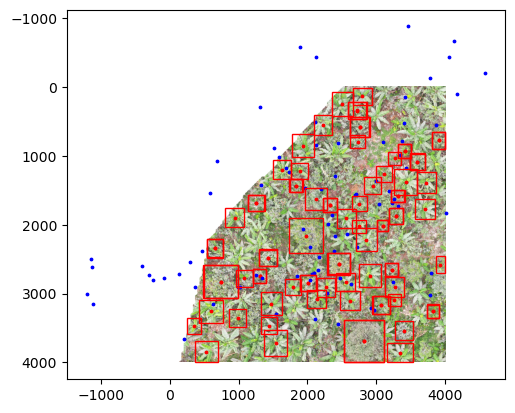

In [207]:
ax = plt.gca()
plt.imshow(img)

plt.scatter(plot_mapping.X, plot_mapping.Y, s=3, c='r')
plt.scatter(plot_mapping.X_field, plot_mapping.Y_field, s=3, c='b')

for tree in zip(plot_mapping.xmin, plot_mapping.ymin, plot_mapping.xmax, plot_mapping.ymax):
    tree1 = [int(x) for x in tree]
    tree_rec = plt.Rectangle((tree1[0], tree1[1]), tree1[2] - tree1[0], tree1[3] - tree1[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(tree_rec)

# plt.savefig("mapping_data_scaled.png", dpi=300)
plt.show()

# Raw Data Exploration

(12305, 12425, 3)


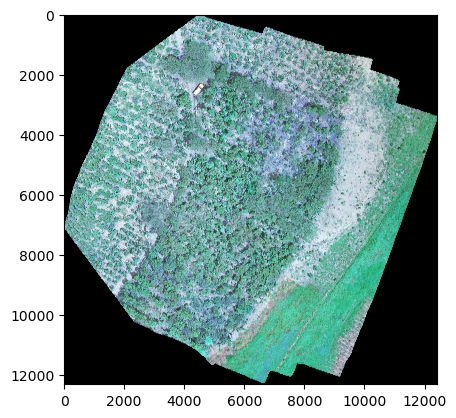

In [357]:
import cv2

site = "Carlos Vera Guevara RGB" # "Nestor Macias RGB" # "Flora Pluas RGB" # "Carlos Vera Arteaga RGB" # "Leonor Aspiazu RGB"
path = '../data/reforestree/wwf_ecuador/RGB Orthomosaics/{}.tif'.format(site)
img = cv2.imread(path)
img = np.array(img)
print(img.shape)

plt.imshow(img)
plt.show()

In [358]:
field_data = pd.read_csv('../data/reforestree/field_data.csv')
# field_data.rename(columns = {'X':'Y', 'Y':'X'}, inplace = True)
field_data.head(3)

name       lat        lon  diameter  height    year plot_id  \
0  Cacao -2.181226 -79.576630       0.0     0.0  2016.0      P8   
1  Cacao -2.181312 -79.576412       0.0     0.0  2016.0      P8   
2  Cacao -2.181438 -79.576322       0.0     0.0  2016.0      P8   

                site            X            Y  updated diameter  group  \
0  Nestor Macias RGB  2761.628615  6831.070678          6.843647  cacao   
1  Nestor Macias RGB  5067.141765  7729.961820          6.843647  cacao   
2  Nestor Macias RGB  6025.223497  9026.909643          6.843647  cacao   

        AGB    carbon  
0  5.444228  2.123249  
1  5.444228  2.123249  
2  5.444228  2.123249

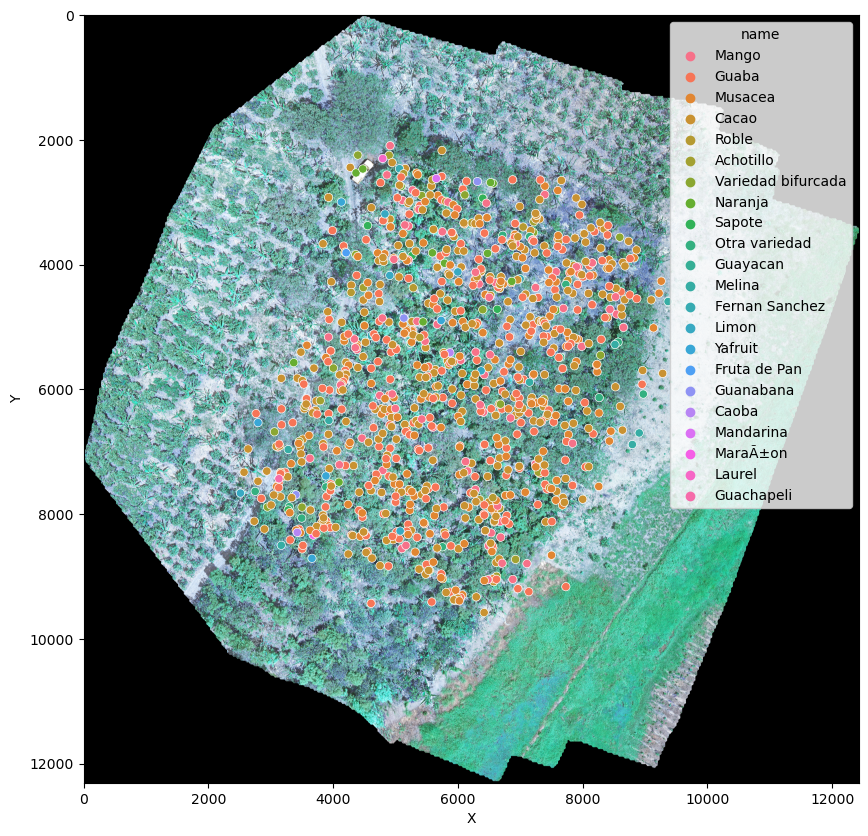

In [363]:
import seaborn as sns
# Leonor Aspiazu RGB_9_7600_3800_11600_7800
x_min = 0
y_min = 0
x_max = img.shape[1]
y_max = img.shape[0]
img_size_x = x_max - x_min # 13855
img_size_y = y_max - y_min # 17134

img_sample = img[y_min:y_min+img_size_y, x_min:x_min+img_size_x]
data_sample = field_data[(field_data.site == site) & (field_data.X >= x_min) & (field_data.X <= x_min + img_size_x) & (field_data.Y >= y_min) & (field_data.Y <= y_min + img_size_y)].copy()
data_sample.X = data_sample.X - x_min
data_sample.Y = data_sample.Y - y_min
plt.figure(figsize=(10,10))
plt.imshow(img_sample)
filtered_data = data_sample[data_sample.name.isin(["Musacea", "Cacao", "Guaba"])].copy()
sns.scatterplot(data=data_sample, x="X", y="Y", hue="name")
plt.show()

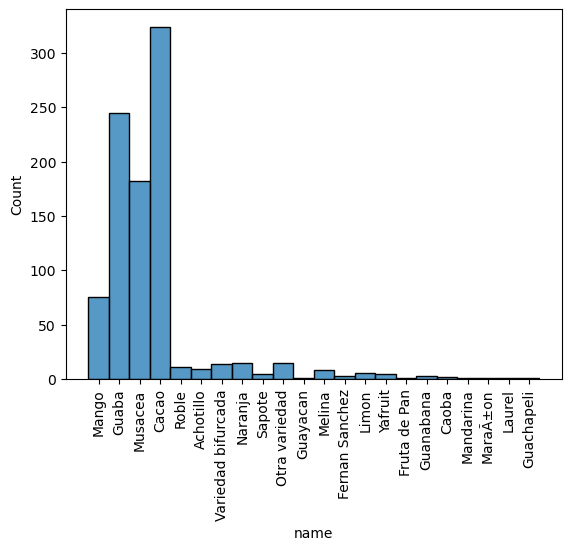

In [348]:
sns.histplot(data=data_sample, x="name")
plt.xticks(rotation=90)
plt.show()

In [364]:
data_analysis = data_sample.groupby(by="name").mean()
data_analysis["count"] = data_sample.groupby(by="name").count()["plot_id"]
data_analysis

/var/folders/nz/fyqhwzv1271gch4y19rxtnwc0000gn/T/ipykernel_77634/1105396250.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_analysis = data_sample.groupby(by="name").mean()


lat        lon   diameter    height    year  \
name                                                                   
Achotillo          -1.198512 -79.591187   1.114082  0.000000  2016.0   
Cacao              -1.198486 -79.591171   0.480619  9.020062  2016.0   
Caoba              -1.198602 -79.591298   8.196460  0.000000  2016.0   
Fernan Sanchez     -1.198290 -79.591209   3.448349  0.000000  2016.0   
Fruta de Pan       -1.198276 -79.591342   6.843647  0.000000  2016.0   
Guaba              -1.198516 -79.591177   8.639690  0.000000  2016.0   
Guachapeli         -1.198664 -79.591447   7.925898  0.000000  2016.0   
Guanabana          -1.198411 -79.591269   0.000000  0.000000  2016.0   
Guayacan           -1.198279 -79.591253   7.002801  0.000000  2016.0   
Laurel             -1.198113 -79.591284   0.000000  0.000000  2016.0   
Limon              -1.198459 -79.591269   0.000000  0.000000  2016.0   
Mandarina          -1.198148 -79.591200   0.000000  0.000000  2016.0   
Mango              -1.198461 -79.591154   5.701084  0.000000  2016.0   
MaraÃ±on           -1.198762 -79.591393   7.957729  0.000000  2016.0   
Melina             -1.198555 -79.591103  12.704514  0.000000  2016.0   
Musacea            -1.198503 -79.591155  14.112463  0.000000  2016.0   
Naranja            -1.198324 -79.591194   0.000000  0.000000  2016.0   
Otra variedad      -1.198517 -79.591161   6.985825  0.000000  2016.0   
Roble              -1.198409 -79.591201   8.822951  0.000000  2016.0   
Sapote             -1.198356 -79.591242   0.840336  0.000000  2016.0   
Variedad bifurcada -1.198425 -79.591215  11.795532  0.000000  2016.0   
Yafruit            -1.198522 -79.591358   7.607588  0.000000  2016.0   

                              X            Y  updated diameter        AGB  \
name                                                                        
Achotillo           5784.665952  6014.580240          6.436918  10.979897   
Cacao               5942.641939  5771.463437          6.606105   5.155125   
Caoba               4648.351350  6850.861833          8.196460  19.789704   
Fernan Sanchez      5557.382681  3939.667755          5.729565   7.359200   
Fruta de Pan        4207.860700  3807.714824          6.843647  12.449709   
Guaba               5878.157152  6045.012040          8.779356  27.538330   
Guachapeli          3130.189999  7431.094492          7.925898  12.701703   
Guanabana           4949.202359  5069.823338          6.843647  12.449709   
Guayacan            5104.715536  3839.297815          7.002801   8.919558   
Laurel              4794.164032  2297.227974          6.843647   8.394925   
Limon               4949.134524  5517.140359          6.843647  12.449709   
Mandarina           5653.268341  2616.877661          6.843647  12.449709   
Mango               6114.333268  5533.179070          5.971228  35.217374   
MaraÃ±on            3680.981379  8335.076105          7.957729  14.738532   
Melina              6639.602609  6411.017434         13.559969  92.377029   
Musacea             6105.152021  5923.912446         13.388397   7.983005   
Naranja             5704.429971  4261.056525          6.843647  12.449709   
Otra variedad       6044.896987  6061.187668          7.442068  14.104329   
Roble               5643.111497  5051.418983          8.822951  19.411270   
Sapote              5224.866000  4560.936564          6.315253  10.646625   
Variedad bifurcada  5494.503899  5199.183173         11.795532  40.418286   
Yafruit             4040.211730  6102.223818          7.607588  18.318932   

                       carbon  count  
name                                  
Achotillo            4.282160      9  
Cacao                2.010499    324  
Caoba                7.717985      2  
Fernan Sanchez       2.870088      3  
Fruta de Pan         4.855386      1  
Guaba               10.739949    245  
Guachapeli           4.953664      1  
Guanabana            4.855386      3  
Guayacan             3.478627      1  
Laurel            

In [365]:
mapping = pd.read_csv('../data/reforestree/mapping/final_dataset.csv')
sample_mapping = mapping[mapping.img_name == site]
print("Detected Trees: ", sample_mapping.shape[0])
print("Measured Trees: ", field_data[field_data.site == site].shape[0])
sample_mapping.head(3)

Detected Trees:  929
Measured Trees:  929


img_path         xmin         ymin  \
0  Carlos Vera Guevara RGB_3_0_8305_4000_12305.png  3332.557861    19.092411   
1  Carlos Vera Guevara RGB_3_0_8305_4000_12305.png  3162.579834  2148.233398   
2  Carlos Vera Guevara RGB_3_0_8305_4000_12305.png  2893.605713   244.011108   

          xmax         ymax     score                 img_name  tile_index  \
0  3661.390137   364.616425  0.531211  Carlos Vera Guevara RGB           3   
1  3431.632324  2379.467041  0.511510  Carlos Vera Guevara RGB           3   
2  3095.620605   451.257812  0.251310  Carlos Vera Guevara RGB           3   

   tile_xmin  tile_ymin  ...  is_musacea_g                     site  \
0          0       8305  ...           1.0  Carlos Vera Guevara RGB   
1          0       8305  ...           1.0  Carlos Vera Guevara RGB   
2          0       8305  ...           1.0  Carlos Vera Guevara RGB   

           X_g          Y_g  updated diameter   group  updated height  \
0  5298.555843  7709.844671         10.281385  banana             0.0   
1  5315.345160  8606.745732         13.528139  banana             0.0   
2  5228.142461  7935.770200         12.732366  banana             0.0   

        AGB    carbon   id  
0  4.293300  1.674387   30  
1  7.702971  3.004159  112  
2  6.769828  2.640233  179  

[3 rows x 43 columns]

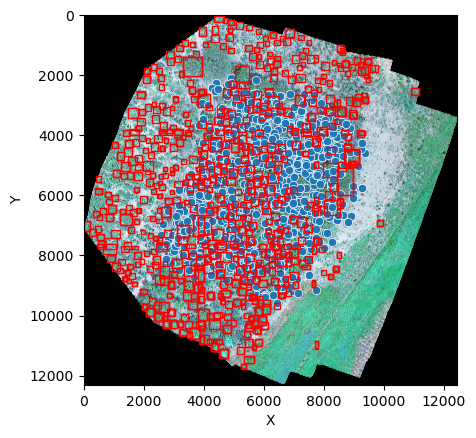

In [366]:
ax = plt.gca()
plt.imshow(img)

sns.scatterplot(data=data_sample, x="X", y="Y")

for tree in zip(sample_mapping.xmin + sample_mapping.tile_xmin, sample_mapping.ymin + sample_mapping.tile_ymin, sample_mapping.xmax + sample_mapping.tile_xmin, sample_mapping.ymax + sample_mapping.tile_ymin):
    tree1 = [int(x) for x in tree]
    tree_rec = plt.Rectangle((tree1[0], tree1[1]), tree1[2] - tree1[0], tree1[3] - tree1[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(tree_rec)

# plt.savefig("detection_field_{}.png".format(site), dpi=200)
plt.show()